In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.optim import Adam
import torch.nn as nn
from torch.utils.data import DataLoader

from binarypredictor.dataset import FunctionDataset
from binarypredictor.net import DerivativeNet

In [2]:
@torch.enable_grad()
def epoch(net, train_loader, loss_func, optimizer):
    epoch_losses = np.zeros([len(train_loader), ])

    for i, d in enumerate(train_loader):
        # Forward
        inp, targets = d[:, :, 0], d[:, :, 1]
        targets[abs(targets) > 1000] = 0
        out = net(inp.float())

        # Calculate the loss
        loss = loss_func(out, targets)
        epoch_losses[i] = loss
        
        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('Epoch loss: ', epoch_losses.mean())
    return epoch_losses.mean()

In [3]:
@torch.enable_grad()
def train(net, train_loader, test_loader):
    # Hyperparameters
    nr_epochs = 100
    lr = 1e-4
    
    # Workers
    loss_func = nn.MSELoss()
    optimizer = Adam(net.parameters(), lr=lr)
    
    # Losses
    losses = np.zeros([nr_epochs, ])
    
    # Baseline for best network
    best_loss = epoch(net, train_loader, loss_func, optimizer)
    best_net = net
    
    # Training
    for i in range(nr_epochs):
        losses[i] = epoch(net, train_loader, loss_func, optimizer)
        
        if losses[i] < best_loss:
            best_net = net
            best_loss = losses[i]
            
    return best_net, losses

In [4]:
in_features = 250

In [5]:
fd_0 = FunctionDataset(100000, 'first.csv', o=0, step=1/in_features)
fd_0.create_functions()
fd_1 = FunctionDataset(100000, 'second.csv', o=1, step=1/in_features)
fd_0.create_functions()

In [6]:
loader_0 = DataLoader(fd_0, batch_size=256, shuffle=True)
loader_1 = DataLoader(fd_1, batch_size=256, shuffle=True)
net_0 = DerivativeNet(train=True, hidden_layers=4, in_features=in_features, out_features=in_features, hidden_size_linear=in_features)
net_1 = DerivativeNet(train=True, hidden_layers=4, in_features=in_features, out_features=in_features, hidden_size_linear=in_features)

In [7]:
best_net_0, _ = train(net_0, loader_0, None)
print('First derivative net trained!')
best_net_1, _ = train(net_1, loader_1, None)
print('Second derivative net trained!')

Epoch loss:  4.251450960898338
Epoch loss:  0.8578915612776871
Epoch loss:  0.7288526116734575
Epoch loss:  0.7136070360917874
Epoch loss:  0.7057855759587739
Epoch loss:  0.7000569104386107
Epoch loss:  0.7016148119402663
Epoch loss:  0.6974100876037422
Epoch loss:  0.6918189503500224
Epoch loss:  0.6967612514105599
Epoch loss:  0.6923502370372148
Epoch loss:  0.6865228600514209
Epoch loss:  0.6913673115508331
Epoch loss:  0.6856069956594111
Epoch loss:  0.6888575098856026
Epoch loss:  0.6849209491706565
Epoch loss:  0.6841493537054038
Epoch loss:  0.6836271283724119
Epoch loss:  0.6859486116015393
Epoch loss:  0.6817287761537011
Epoch loss:  0.6840296075929462
Epoch loss:  0.6837916059414749
Epoch loss:  0.6841759489625311
Epoch loss:  0.6792902931990221
Epoch loss:  0.6801505450092619
Epoch loss:  0.6835902662914427
Epoch loss:  0.6821415291722778
Epoch loss:  0.6776292680779381
Epoch loss:  0.6782526450083993
Epoch loss:  0.677489651514746
Epoch loss:  0.6802980363216546
Epoch loss

In [8]:
#torch.save(net_0, 'FirstDerivativeNet_250_s.pth')
#torch.save(net_1, 'SecondDerivativeNet_250_s.pth')

In [9]:
#net_0 = torch.load('FirstDerivativeNet_250.pth')
#net_1 = torch.load('SecondDerivativeNet_250.pth')

In [10]:
x = torch.arange(0., 1., step=1/in_features)

##########################


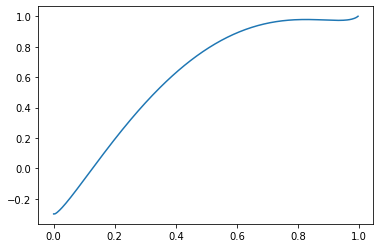

tensor([ 26, 223])


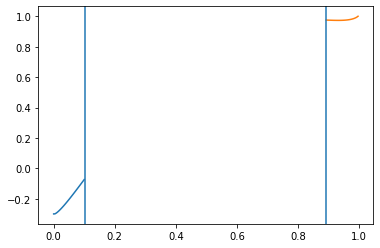

##########################


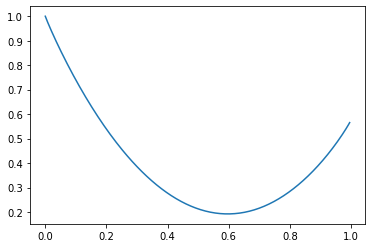

tensor([], dtype=torch.int64)


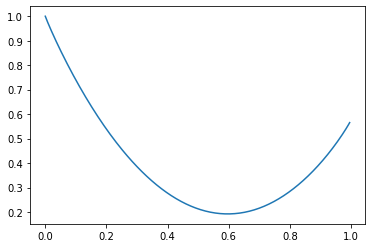

##########################


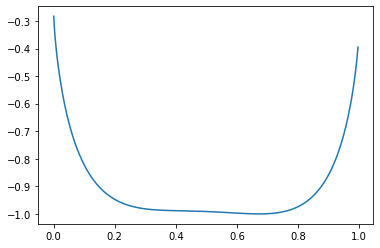

tensor([ 73, 187])


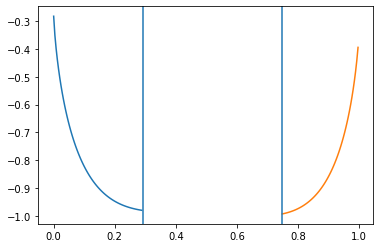

##########################


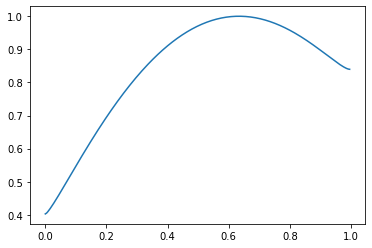

tensor([ 17, 232])


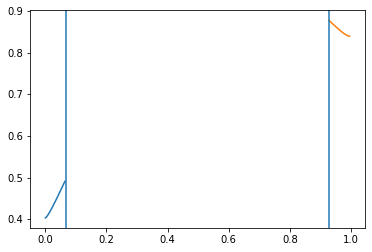

##########################


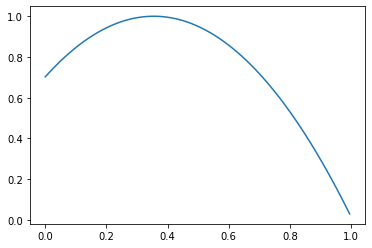

tensor([], dtype=torch.int64)
##########################


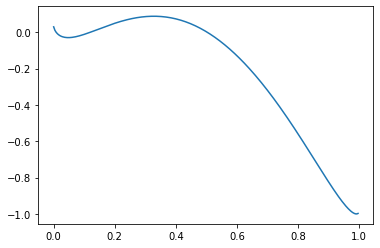

tensor([ 32, 217])


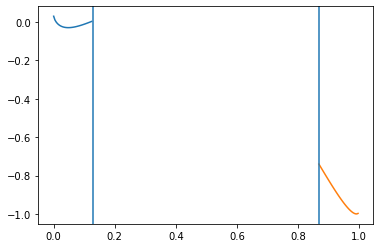

##########################


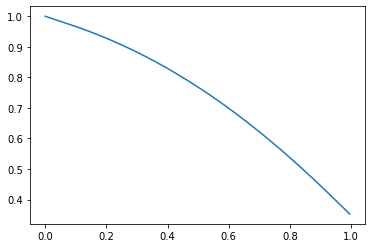

tensor([  9, 241])


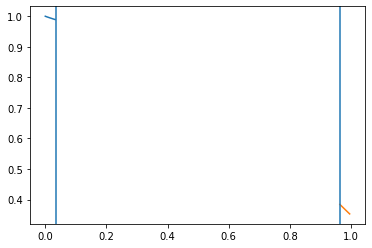

##########################


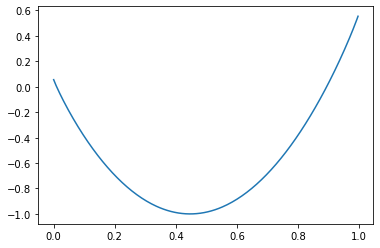

tensor([], dtype=torch.int64)


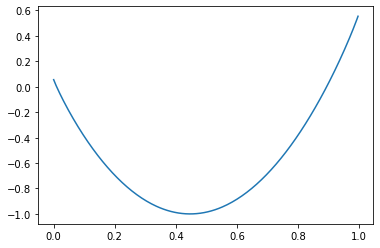

##########################


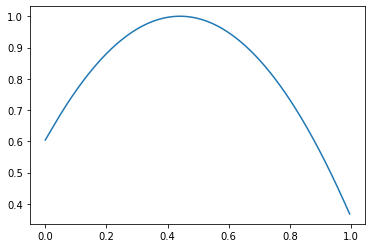

tensor([  1, 248])


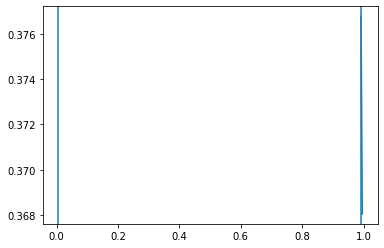

##########################


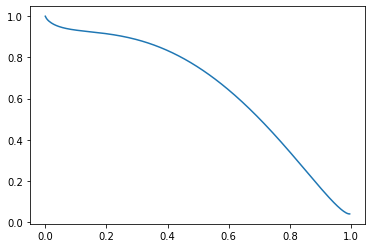

tensor([ 32, 217])


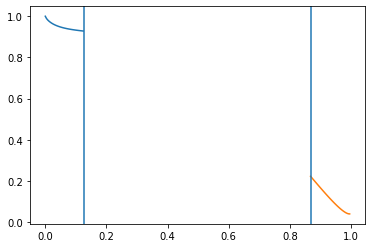

##########################


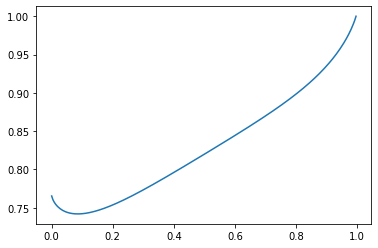

tensor([ 95, 160])


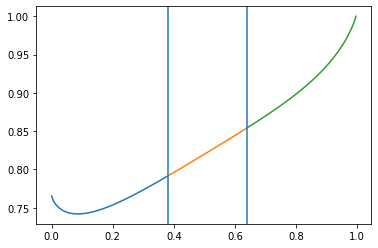

##########################


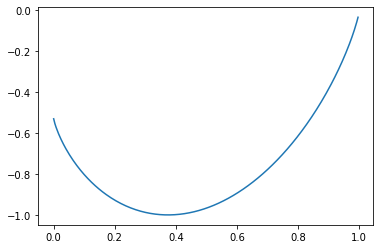

tensor([], dtype=torch.int64)


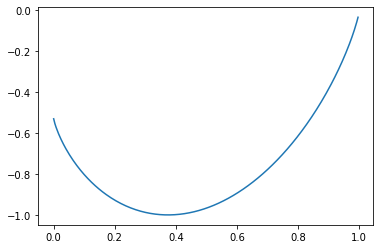

##########################


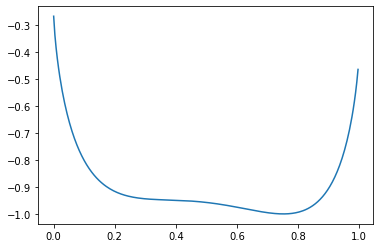

tensor([ 73, 187])


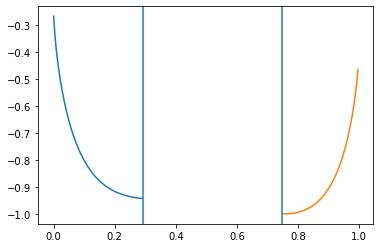

##########################


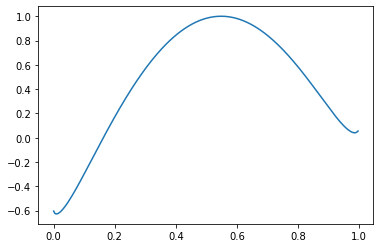

tensor([ 27, 221])


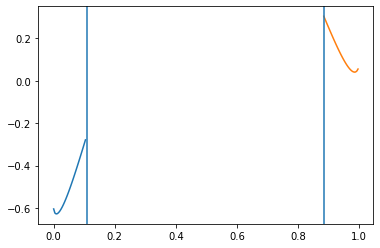

##########################


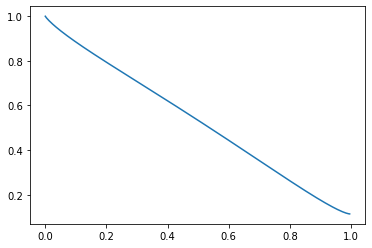

tensor([ 55, 199])


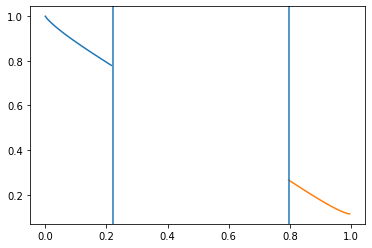

##########################


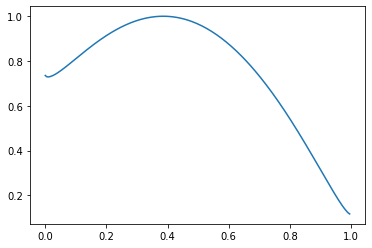

tensor([ 22, 227])


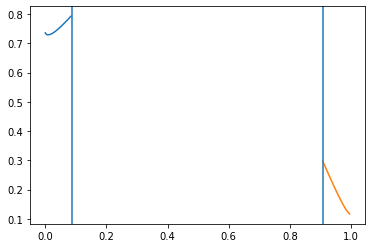

##########################


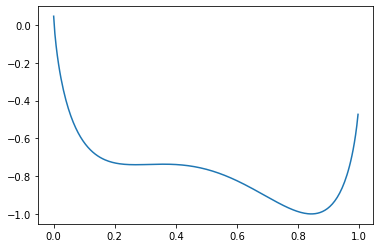

tensor([ 66, 187])


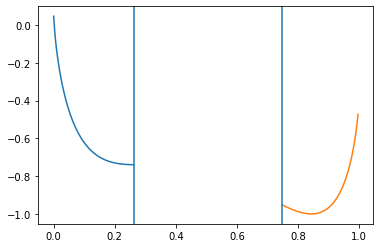

##########################


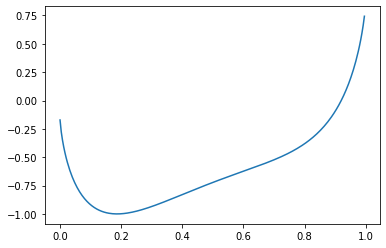

tensor([ 73, 187])


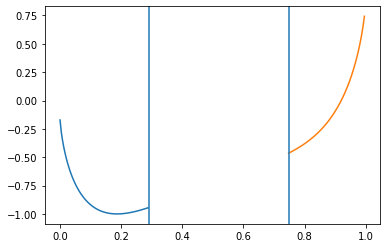

##########################


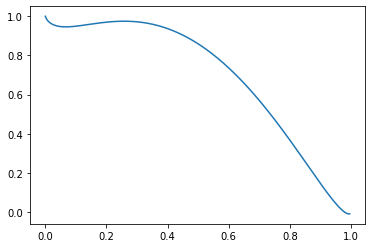

tensor([ 32, 217])


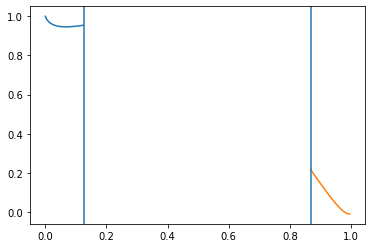

##########################


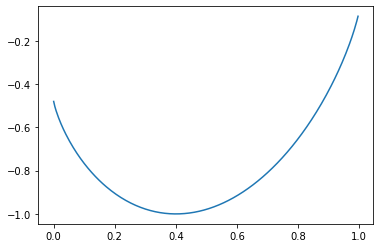

tensor([], dtype=torch.int64)


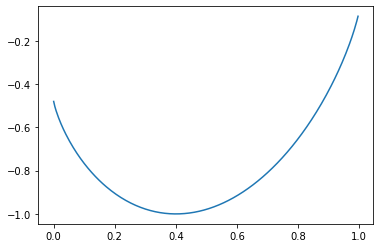

##########################


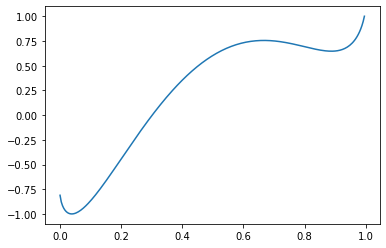

tensor([ 41, 209])


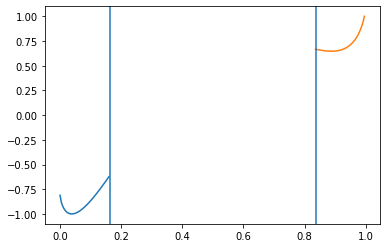

##########################


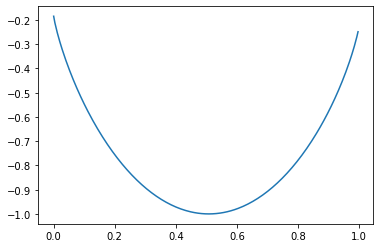

tensor([], dtype=torch.int64)


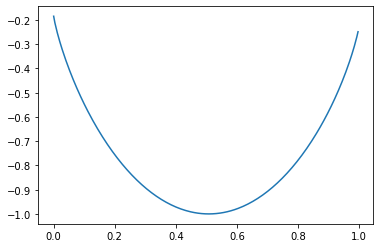

##########################


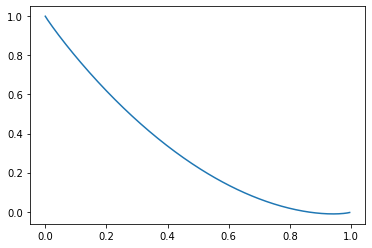

tensor([], dtype=torch.int64)


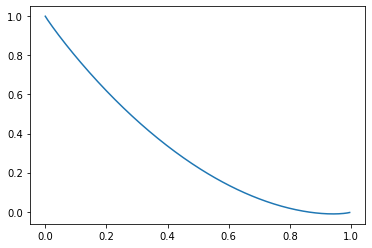

##########################


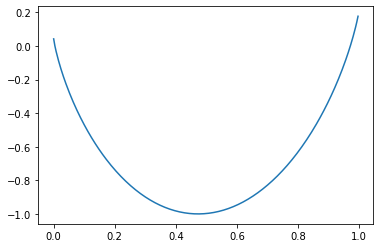

tensor([], dtype=torch.int64)


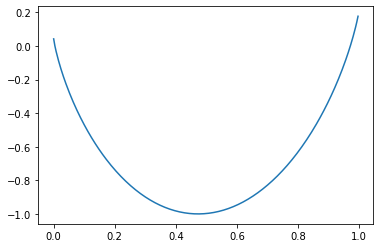

##########################


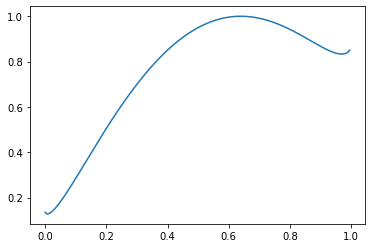

tensor([ 28, 220])


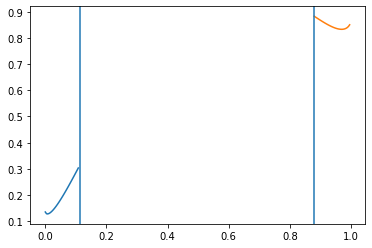

##########################


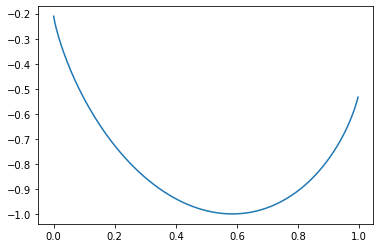

tensor([], dtype=torch.int64)


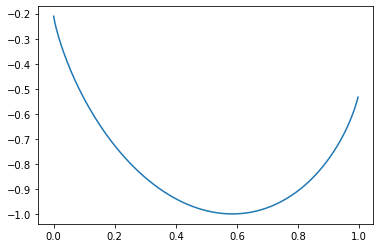

##########################


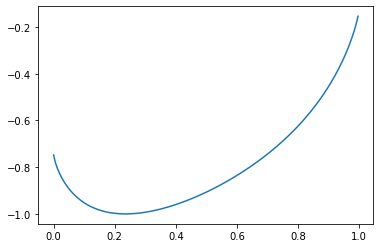

tensor([], dtype=torch.int64)


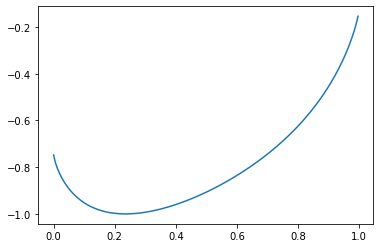

##########################


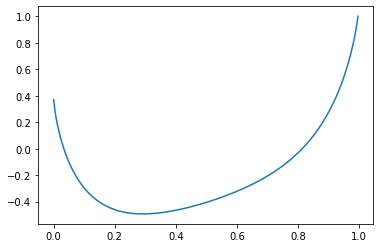

tensor([103, 140])


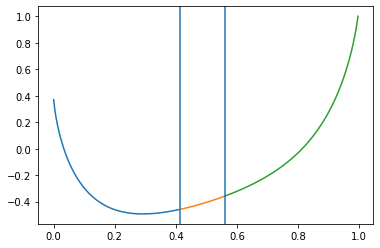

##########################


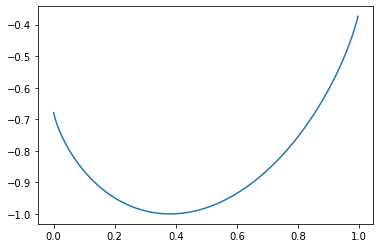

tensor([], dtype=torch.int64)


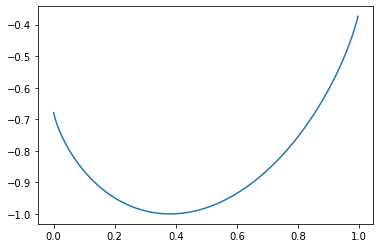

##########################


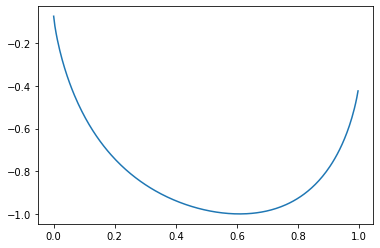

tensor([], dtype=torch.int64)


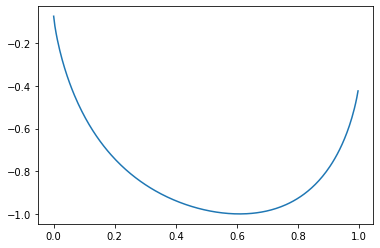

##########################


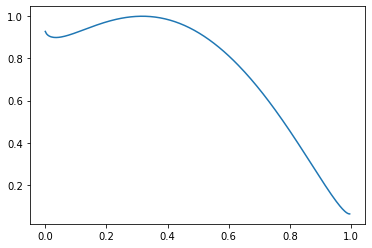

tensor([ 27, 221])


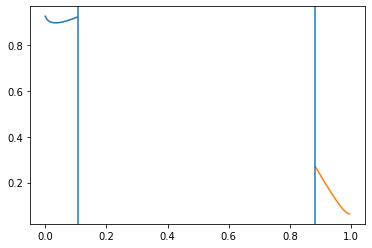

##########################


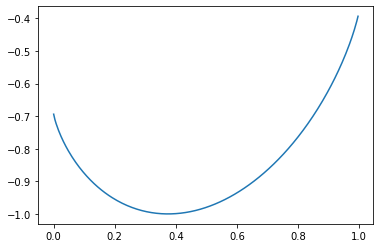

tensor([], dtype=torch.int64)


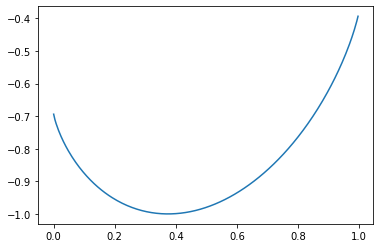

##########################


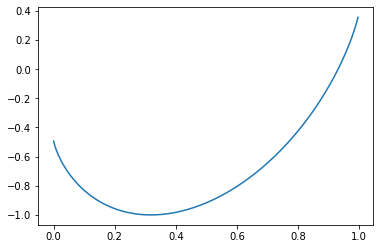

tensor([], dtype=torch.int64)


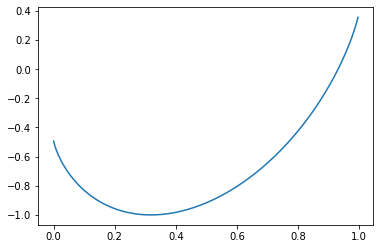

##########################


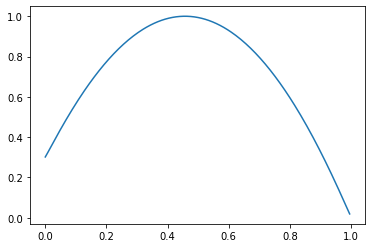

tensor([  2, 247])


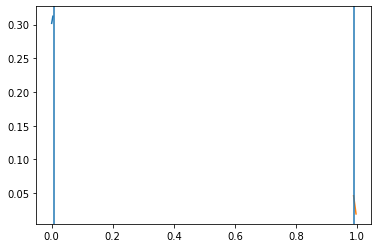

##########################


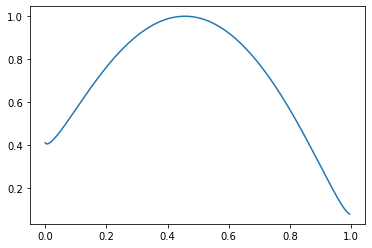

tensor([ 23, 226])


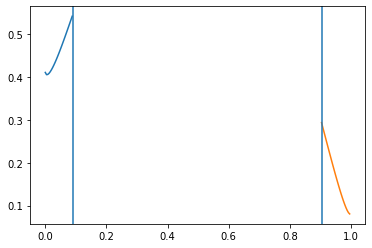

##########################


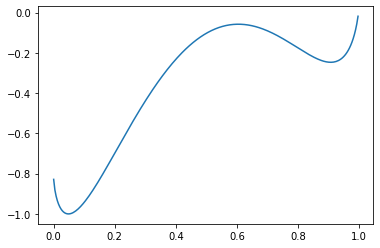

tensor([ 43, 209])


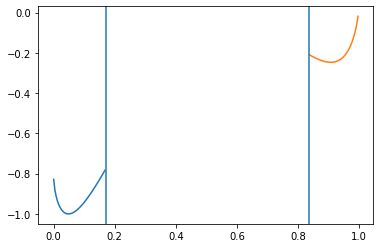

##########################


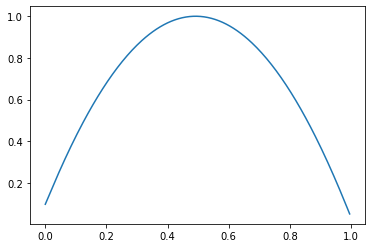

tensor([], dtype=torch.int64)
##########################


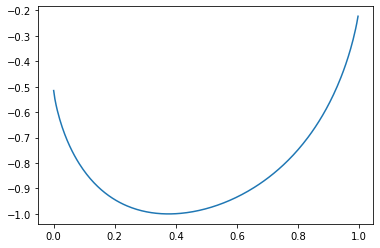

tensor([], dtype=torch.int64)


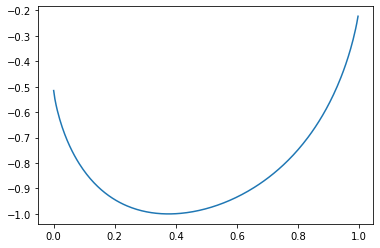

##########################


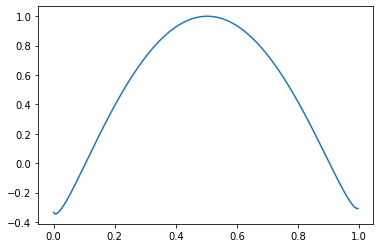

tensor([ 25, 224])


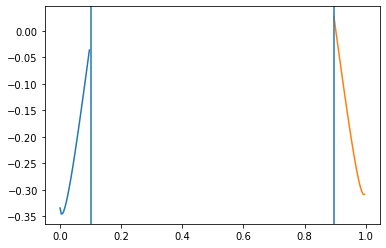

##########################


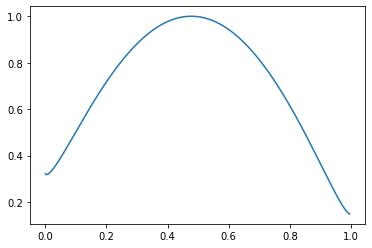

tensor([ 22, 227])


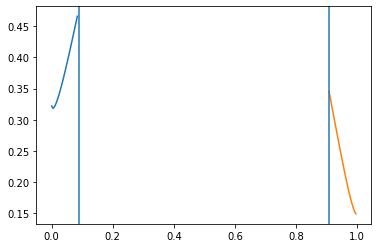

##########################


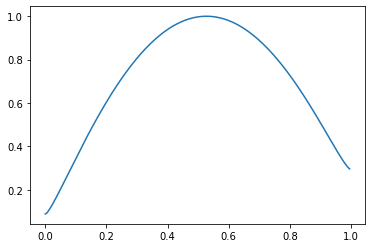

tensor([ 17, 232])


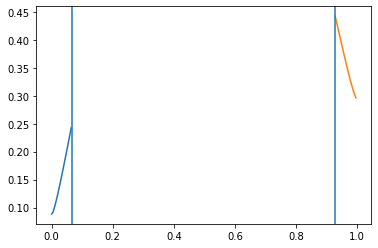

##########################


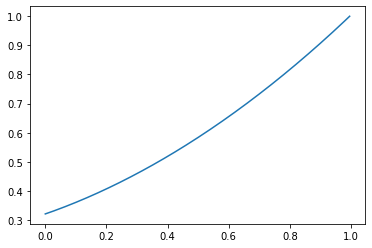

tensor([], dtype=torch.int64)


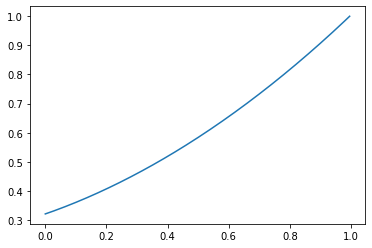

##########################


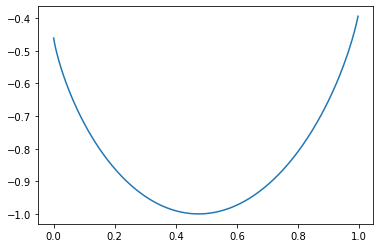

tensor([], dtype=torch.int64)


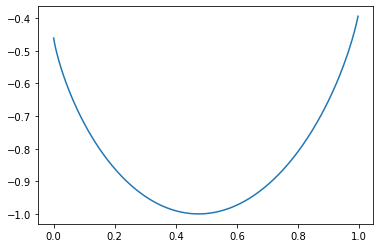

##########################


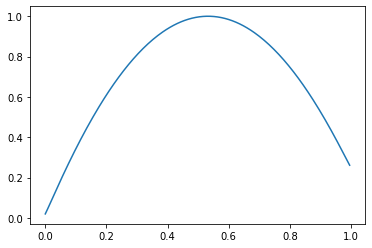

tensor([  2, 247])


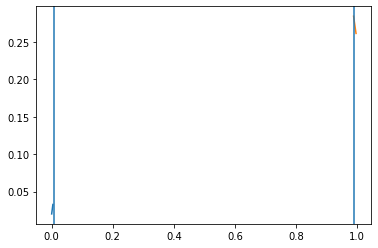

##########################


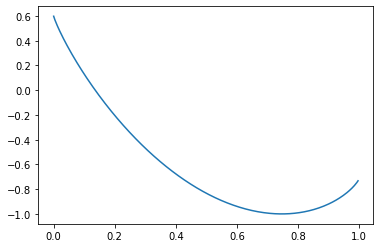

tensor([], dtype=torch.int64)


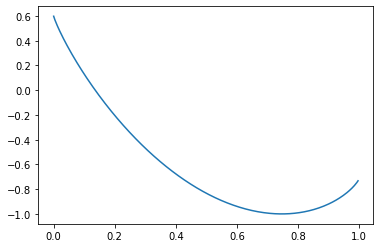

##########################


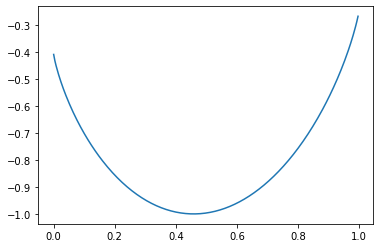

tensor([], dtype=torch.int64)


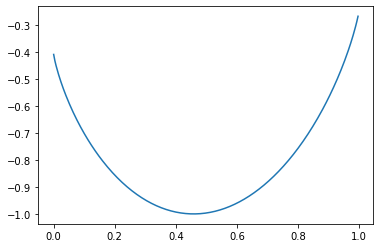

##########################


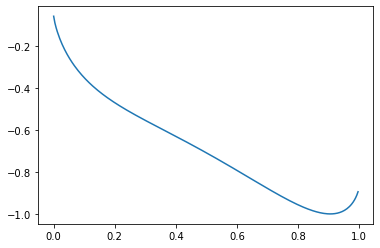

tensor([ 71, 187])


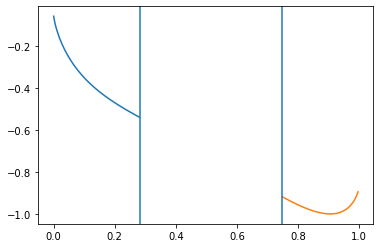

##########################


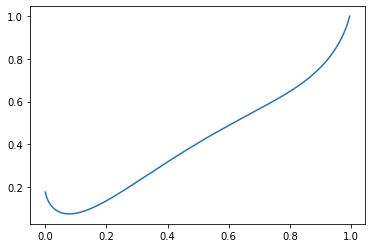

tensor([ 71, 187])


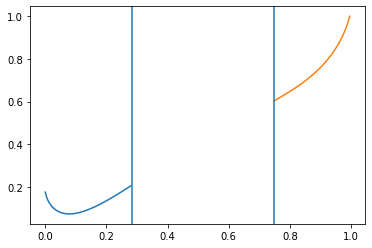

##########################


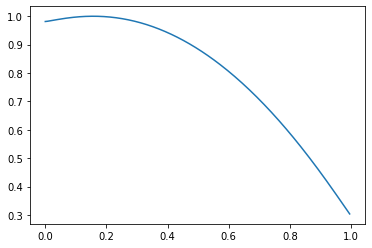

tensor([  6, 243])


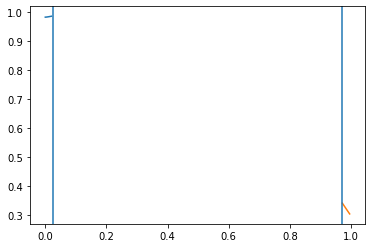

##########################


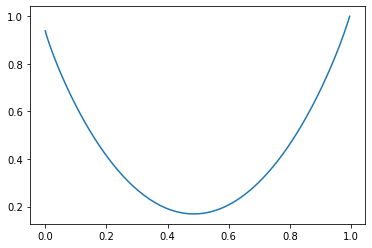

tensor([], dtype=torch.int64)


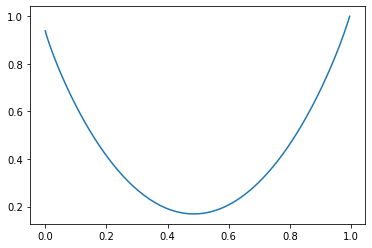

In [11]:
fd_test = FunctionDataset(50, 'None.csv', o=0, step=1/in_features, overwrite=True)

for d in fd_test:
    print('##########################')
    plt.plot(x, d[:, 0])
    plt.show()
    #plt.plot(x, d[:, 1])
    
    out = net_0(d[:, 0])
    #plt.plot(x, out.detach())
    #plt.show()
    
    second_der = net_1(out)
    #plt.plot(x, second_der.detach())
    #plt.show()
    
    idx = torch.where(torch.diff(torch.sign(second_der)) != 0)[0]
    idx = idx[idx != 0]
    if len(idx) > 0:
        min_diff = 5
        valid_idx = [idx[i] for i in range(1, len(idx) - 1) if idx[i + 1] - idx[i] > min_diff and abs(idx[i] - idx[i - 1]) > min_diff]
        if idx[-1] - idx[0] > min_diff:
            valid_idx += [idx[0]] + [idx[-1]]
        idx = torch.tensor(sorted(valid_idx), dtype=torch.int64)
        
    print(idx)
    x_idx = x[idx]
    
    x_split, f_split, s_split = torch.tensor_split(x, idx), torch.tensor_split(d[:, 0], idx), torch.tensor_split(second_der, idx)
    
    x_split_, f_split_ = [], []
    # Remove curve parts with negative curvature
    for i, s in enumerate(s_split):
        if torch.sum(torch.sign(s)) >= 0:
            x_split_.append(x_split[i])
            f_split_.append(f_split[i])
    
    for x_, f_ in zip(x_split_, f_split_):
        plt.plot(x_, f_)
    for i in x_idx:
        plt.axvline(i)
    plt.show()